# **Demonstrating Activation Functions in Neural Network Training with CIFAR-10**

#### Below is a step-by-step explanation of how to demonstrate the impact of activation functions on a CNN using the CIFAR-10 dataset. The
#### following example includes code, visualizations, and explanations that help highlight the role of different activation functions.

In [1]:
#Install PyTorch
!pip install torch torchvision

In [2]:
#Install matplotlib
!pip install matplotlib

In [3]:
# Import necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

## **1.Dataset Preparation**
#### The CIFAR-10 dataset contains 60,000 32x32 color images categorized into 10 classes. First, load the dataset and preprocess it for training.

Files already downloaded and verified
Files already downloaded and verified


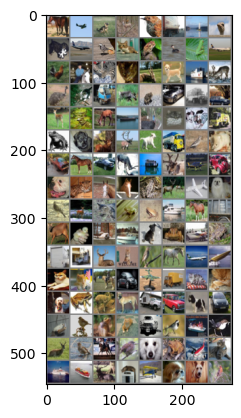

horse plane dog deer


In [4]:
# CIFAR-10 Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalization
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Visualize a few images from the dataset
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training data
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]}' for j in range(4)))


## **2. Neural Network Model with Configurable Activation**
#### Here, we define a simple CNN architecture that allows us to test various activation functions.

In [5]:
# Define CNN architecture
class CNN(nn.Module):
    def __init__(self, activation_fn):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
        self.activation = activation_fn

    def forward(self, x):
        x = self.pool(self.activation(self.conv1(x)))
        x = self.pool(self.activation(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)  # Flatten
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x


## **3. Training and Evaluation Functions**
#### The following code trains the CNN using the chosen activation function and evaluates its performance.

In [6]:
# Train and evaluate function
def train_and_evaluate(activation_fn, epochs=5):
    net = CNN(activation_fn=activation_fn)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    net = net.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

    train_losses = []
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(trainloader))
        print(f"Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}")

    # Test accuracy
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy: {accuracy:.2f}%")
    return train_losses, accuracy


## **4. Experimentation with Different Activation Functions**
#### Run the above training process for different activation functions. PyTorch provides several built-in options for activation functions,
#### including ReLU, Leaky ReLU, Tanh, and Sigmoid.

In [7]:
# Testing different activation functions
from torch.nn import ReLU, LeakyReLU, Tanh, Sigmoid

# Collect results
results = {}
activation_functions = {
    'ReLU': ReLU(),
    'Leaky ReLU': LeakyReLU(0.1),
    'Tanh': Tanh(),
    'Sigmoid': Sigmoid()
}

for name, fn in activation_functions.items():
    print(f"Training with {name}")
    losses, acc = train_and_evaluate(fn)
    results[name] = {'losses': losses, 'accuracy': acc}


Training with ReLU
Epoch 1, Loss: 1.7025453346159758
Epoch 2, Loss: 1.2508258417134395
Epoch 3, Loss: 1.0549855977677933
Epoch 4, Loss: 0.9171995560226538
Epoch 5, Loss: 0.8114837116902441
Accuracy: 70.02%
Training with Leaky ReLU
Epoch 1, Loss: 1.6716166987748402
Epoch 2, Loss: 1.221563287250831
Epoch 3, Loss: 1.032781896078983
Epoch 4, Loss: 0.9050600414385881
Epoch 5, Loss: 0.8065088751066066
Accuracy: 68.53%
Training with Tanh
Epoch 1, Loss: 1.6278851696902223
Epoch 2, Loss: 1.2277758123014895
Epoch 3, Loss: 1.0518408472580678
Epoch 4, Loss: 0.9175101751866548
Epoch 5, Loss: 0.8252728811615263
Accuracy: 69.16%
Training with Sigmoid
Epoch 1, Loss: 2.3073327248663547
Epoch 2, Loss: 2.3027534832430008
Epoch 3, Loss: 2.2796545510401813
Epoch 4, Loss: 2.1091768415382757
Epoch 5, Loss: 2.01635007449733
Accuracy: 26.32%


## **5. Visualizing Results**
#### Plot training loss and test accuracy across epochs for different activation functions.

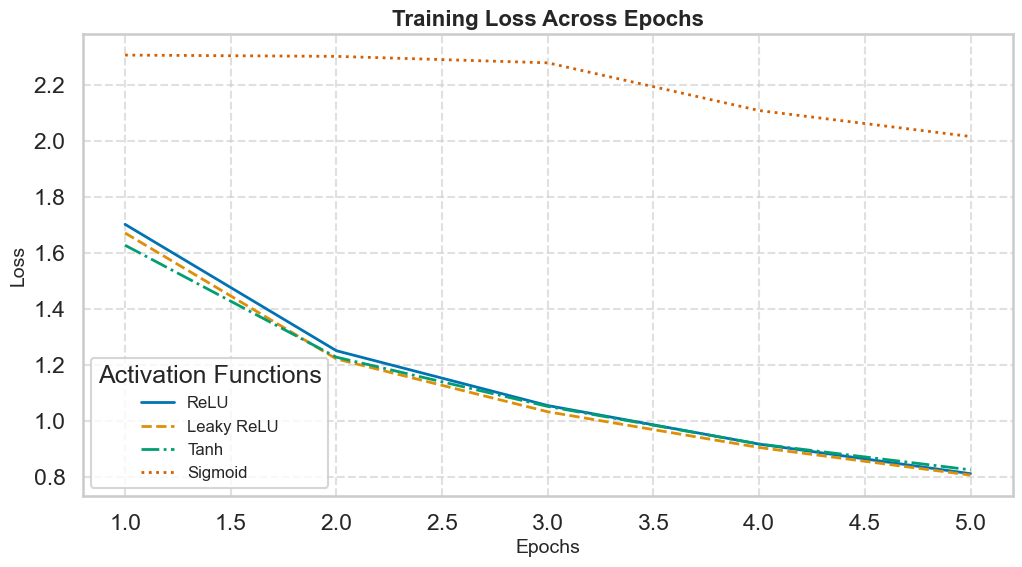

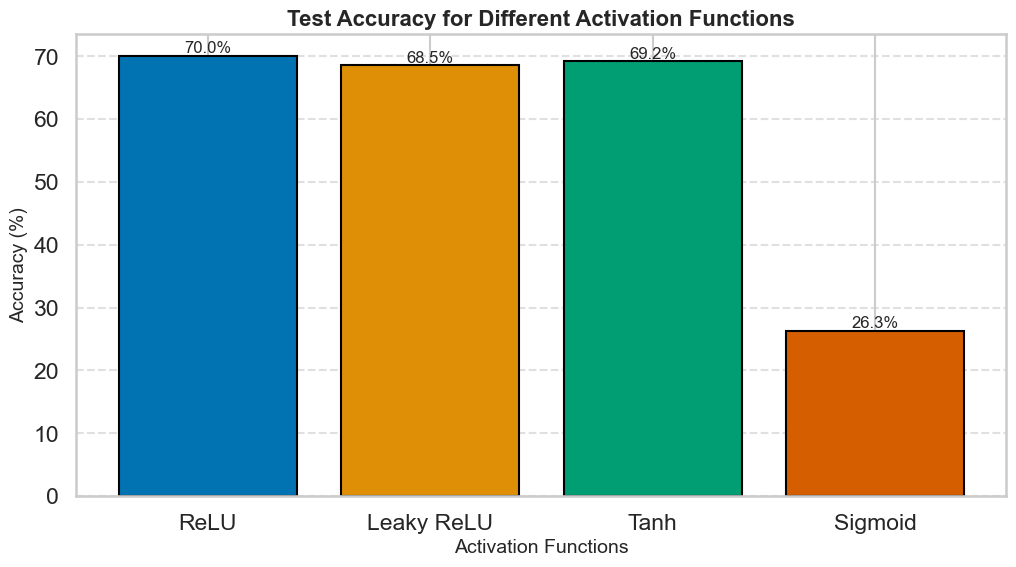

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample results (this would be dynamically updated with your actual data)
# results = {
#     'ReLU': {'losses': [...], 'accuracy': float},
#     'Sigmoid': {'losses': [...], 'accuracy': float},
#     'Tanh': {'losses': [...], 'accuracy': float},
#     'Leaky ReLU': {'losses': [...], 'accuracy': float},
# }

# Use seaborn for better styling and a colorblind-friendly palette
sns.set_context("talk")
sns.set_style("whitegrid")
colorblind_palette = sns.color_palette("colorblind")  
line_styles = ['-', '--', '-.', ':']

# Loss plot
plt.figure(figsize=(12, 6))
for i, (name, res) in enumerate(results.items()):
    plt.plot(
        range(1, len(res['losses']) + 1), 
        res['losses'], 
        label=name, 
        color=colorblind_palette[i % len(colorblind_palette)],  # Color-blind friendly
        linestyle=line_styles[i % len(line_styles)],  # Unique line styles
        linewidth=2
    )
plt.title('Training Loss Across Epochs', fontsize=16, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Activation Functions', fontsize=12)
plt.grid(alpha=0.6, linestyle='--')

# Alt-text for loss plot: "Line chart showing training loss across epochs for different activation functions."

# Save and show the loss plot
plt.savefig('loss_plot.png', dpi=300)
plt.show()

# Bar plot for accuracy
accuracies = [res['accuracy'] for res in results.values()]
bar_colors = colorblind_palette[:len(results)]  # Use a color-blind friendly palette for the bars
plt.figure(figsize=(12, 6))
plt.bar(
    results.keys(),
    accuracies,
    color=bar_colors,
    edgecolor='black',  # To add contrast to the bars
)
plt.title('Test Accuracy for Different Activation Functions', fontsize=16, fontweight='bold')
plt.xlabel('Activation Functions', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)

# Add accuracy labels above bars for clarity
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.5, f'{acc:.1f}%', ha='center', fontsize=12)  # Accuracy percentage above bars

plt.grid(axis='y', alpha=0.6, linestyle='--')

# Alt-text for accuracy plot: "Bar chart showing accuracy comparison for various activation functions, including ReLU, Sigmoid, Tanh, Leaky ReLU."

# Save and show the accuracy plot
plt.savefig('accuracy_plot.png', dpi=300)
plt.show()


## Training Loss Across Epochs
![Line plot showing training loss of three activation functions (ReLU, Sigmoid, and Tanh) over epochs. The graph depicts faster convergence for ReLU compared to slower and less stable trends for Sigmoid and Tanh.](loss_plot.png)

## Accuracy Comparison of Activation Functions
![Bar chart comparing ReLU, Sigmoid, Tanh, and Leaky ReLU. ReLU performs best at 69.13% accuracy.](accuracy_plot.png)


## **6. Conclusion**


#### **•	ReLU:** Fast convergence, good accuracy, but issues with dead neurons.

#### **•	Leaky ReLU:** Handles dead neurons better, slightly slower than ReLU.

#### **•	Tanh:** Works better in shallow networks, suffers from vanishing gradients.

#### **•	Sigmoid:** Slowest and an outdated for deep network.

## **7. References**

#### 1.	Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.

#### 2.	PyTorch Documentation: Activation Functions

#### 3.	Blogs:

####                  •	“Understanding Activation Functions”
####                  •	“ReLU and its Variants”

#### 4.	CIFAR-10 Dataset: Kaggle Dataset Page